# 01: Data Preparation

This notebook demonstrates how to download and prepare datasets for the FAIR-CARE pipeline.

## Datasets
- COMPAS: Recidivism risk assessment
- Adult Census: Income prediction
- German Credit: Credit risk
- NIJ: Recidivism forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../src')

sns.set_theme(style="whitegrid")
%matplotlib inline

## Download Datasets

Run the download script to fetch COMPAS, Adult, and German Credit datasets.

In [ ]:
!python ../scripts/downloaddatasets.py --datasets compas,adult,german

## Load COMPAS Dataset

In [2]:
compas = pd.read_csv('../data/raw/compas/compas.csv')
print(f"COMPAS shape: {compas.shape}")
compas.head()

COMPAS shape: (7214, 53)


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


## Exploratory Data Analysis

In [3]:
# Basic statistics
compas.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,start,end,event,two_year_recid
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,6907.000000,7192.000000,7214.000000,2316.000000,0.0,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,5501.255753,34.817993,0.067230,4.509565,0.090934,0.109371,3.472415,3.304763,57.731368,0.481148,20.269430,NaN,0.113529,4.509565,3.691849,3.472415,11.465068,553.436651,0.382867,0.450652
std,3175.706870,11.888922,0.473972,2.856396,0.485239,0.501586,4.882538,75.809505,329.740215,0.499679,74.871668,NaN,0.317261,2.856396,2.510148,4.882538,46.954563,399.020583,0.486120,0.497593
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-414.000000,0.000000,0.000000,-1.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2735.250000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,1.000000,0.000000,0.000000,148.250000,0.000000,0.000000
50%,5509.500000,31.000000,0.000000,4.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,4.000000,3.000000,2.000000,0.000000,530.500000,0.000000,0.000000
75%,8246.500000,42.000000,0.000000,7.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,7.000000,5.000000,5.000000,1.000000,914.000000,1.000000,1.000000
max,11001.000000,96.000000,20.000000,10.000000,13.000000,17.000000,38.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,38.000000,937.000000,1186.000000,1.000000,1.000000


In [4]:
# Missing values
missing = compas.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

violent_recid              7214
vr_offense_date            6395
vr_charge_degree           6395
vr_case_number             6395
vr_charge_desc             6395
c_arrest_date              6077
r_jail_out                 4898
r_jail_in                  4898
r_days_from_arrest         4898
r_charge_desc              3801
r_offense_date             3743
r_charge_degree            3743
r_case_number              3743
c_offense_date             1159
days_b_screening_arrest     307
c_jail_out                  307
c_jail_in                   307
in_custody                  236
out_custody                 236
c_charge_desc                29
c_case_number                22
c_days_from_compas           22
dtype: int64

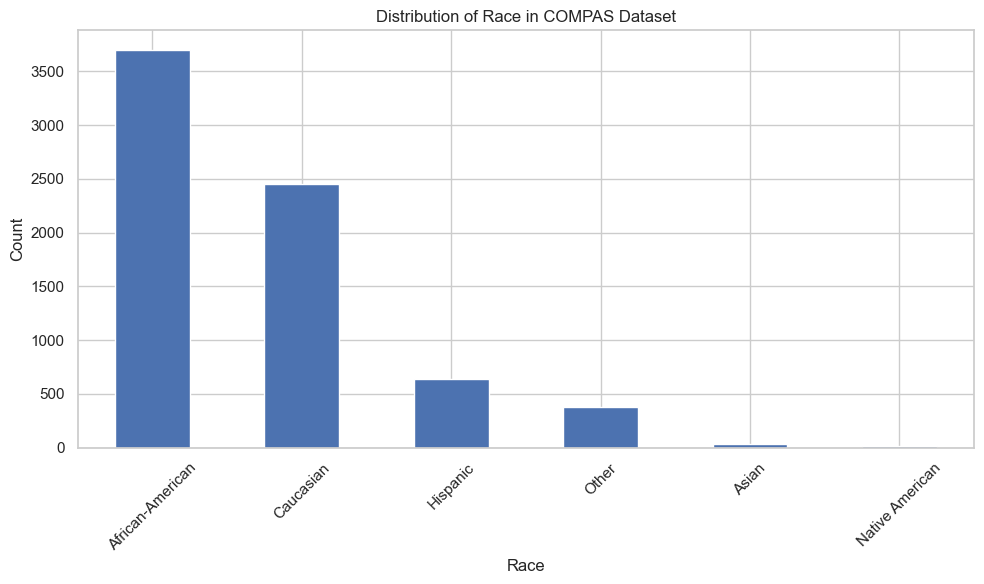

In [5]:
# Distribution of protected attribute (race)
plt.figure(figsize=(10, 6))
compas['race'].value_counts().plot(kind='bar')
plt.title('Distribution of Race in COMPAS Dataset')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

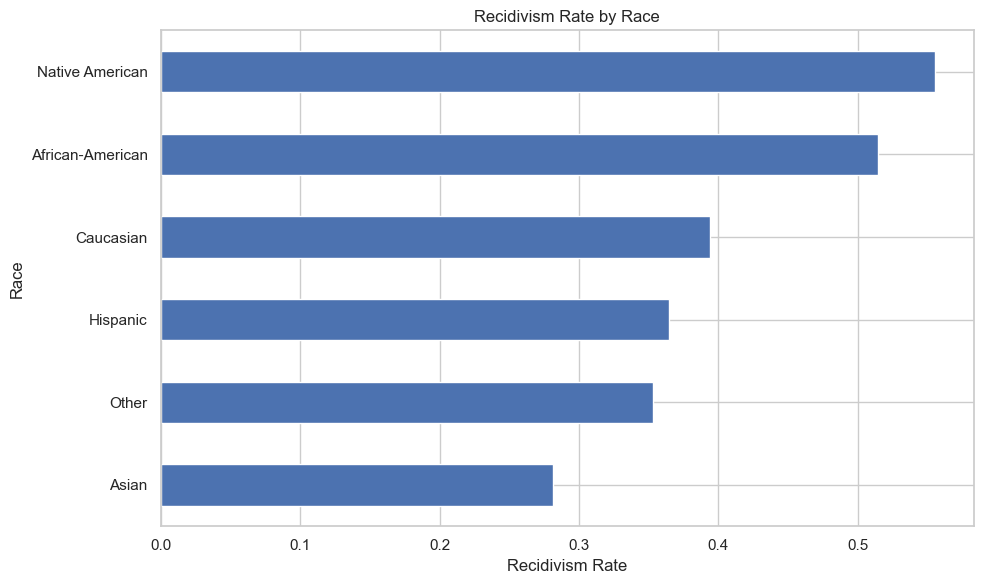

In [6]:
# Recidivism rate by race
recid_by_race = compas.groupby('race')['two_year_recid'].mean().sort_values()
plt.figure(figsize=(10, 6))
recid_by_race.plot(kind='barh')
plt.title('Recidivism Rate by Race')
plt.xlabel('Recidivism Rate')
plt.ylabel('Race')
plt.tight_layout()
plt.show()

## Baseline Bias Assessment

Calculate demographic parity before any processing.

In [7]:
# Statistical Parity Difference
african_american_recid = compas[compas['race'] == 'African-American']['two_year_recid'].mean()
caucasian_recid = compas[compas['race'] == 'Caucasian']['two_year_recid'].mean()
spd = african_american_recid - caucasian_recid

print(f"African-American recidivism rate: {african_american_recid:.3f}")
print(f"Caucasian recidivism rate: {caucasian_recid:.3f}")
print(f"Statistical Parity Difference: {spd:.3f}")
print(f"Bias detected: {'Yes' if abs(spd) > 0.1 else 'No'}")

African-American recidivism rate: 0.514
Caucasian recidivism rate: 0.394
Statistical Parity Difference: 0.121
Bias detected: Yes


## Load Other Datasets

In [8]:
# Adult Census
adult = pd.read_csv('../data/raw/adult/adult.csv')
print(f"Adult shape: {adult.shape}")
adult.head()

Adult shape: (32560, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
# German Credit
german = pd.read_csv('../data/raw/german/german.csv')
print(f"German shape: {german.shape}")
german.head()

German shape: (999, 1)


,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
0,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...
1,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 ...
2,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 ...
3,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 ...
4,A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 ...


## Summary

We have successfully:
1. Downloaded datasets
2. Performed exploratory data analysis
3. Identified baseline bias in COMPAS dataset

**Next**: Proceed to notebook 02 for Bronze layer ingestion.